Month
1     4464
3     4464
5     4216
7     4216
8     4216
10    4216
12    4216
4     4080
6     4080
9     4080
11    4080
2     4072
Name: count, dtype: int64


,충남_기온,신안_기온,해남_기온,진도_기온,완도_기온,고흥_기온,전북_기온,부산_기온,경기_기온,Year,Month
207,12.222741,13.115762,12.407756,13.278285,13.925336,13.129422,12.254121,14.177439,12.528953,2024,4
208,17.954851,18.505578,17.791481,18.418772,18.976527,18.027983,17.995208,18.678206,18.353893,2024,5
209,22.488021,22.630152,22.145020,22.025317,22.525585,21.723875,22.535458,21.912006,23.078670,2024,6
210,25.960275,26.289572,25.851930,25.684250,26.155012,25.411108,26.004146,25.401843,26.194898,2024,7
211,26.725543,27.495286,26.637070,26.810305,27.379394,26.446252,26.770730,27.141403,26.911675,2024,8
212,22.209318,23.332729,22.007838,22.961396,23.551030,22.301135,22.266631,23.380366,22.397503,2024,9
213,15.885665,17.543682,15.741189,17.344442,18.019862,16.376627,15.973899,18.600680,15.438492,2024,10
214,9.331939,11.343823,9.365723,11.404233,11.916153,10.034487,9.485434,12.620995,7.995329,2024,11
215,2.505871,4.757224,3.184289,4.944560,5.688965,3.830549,2.574393,5.939656,0.345358,2024,12
216,0.383580,2.509812,1.366375,2.829062,3.699206,2.103416,0.419368,4.181769,-1.549008,2025,1


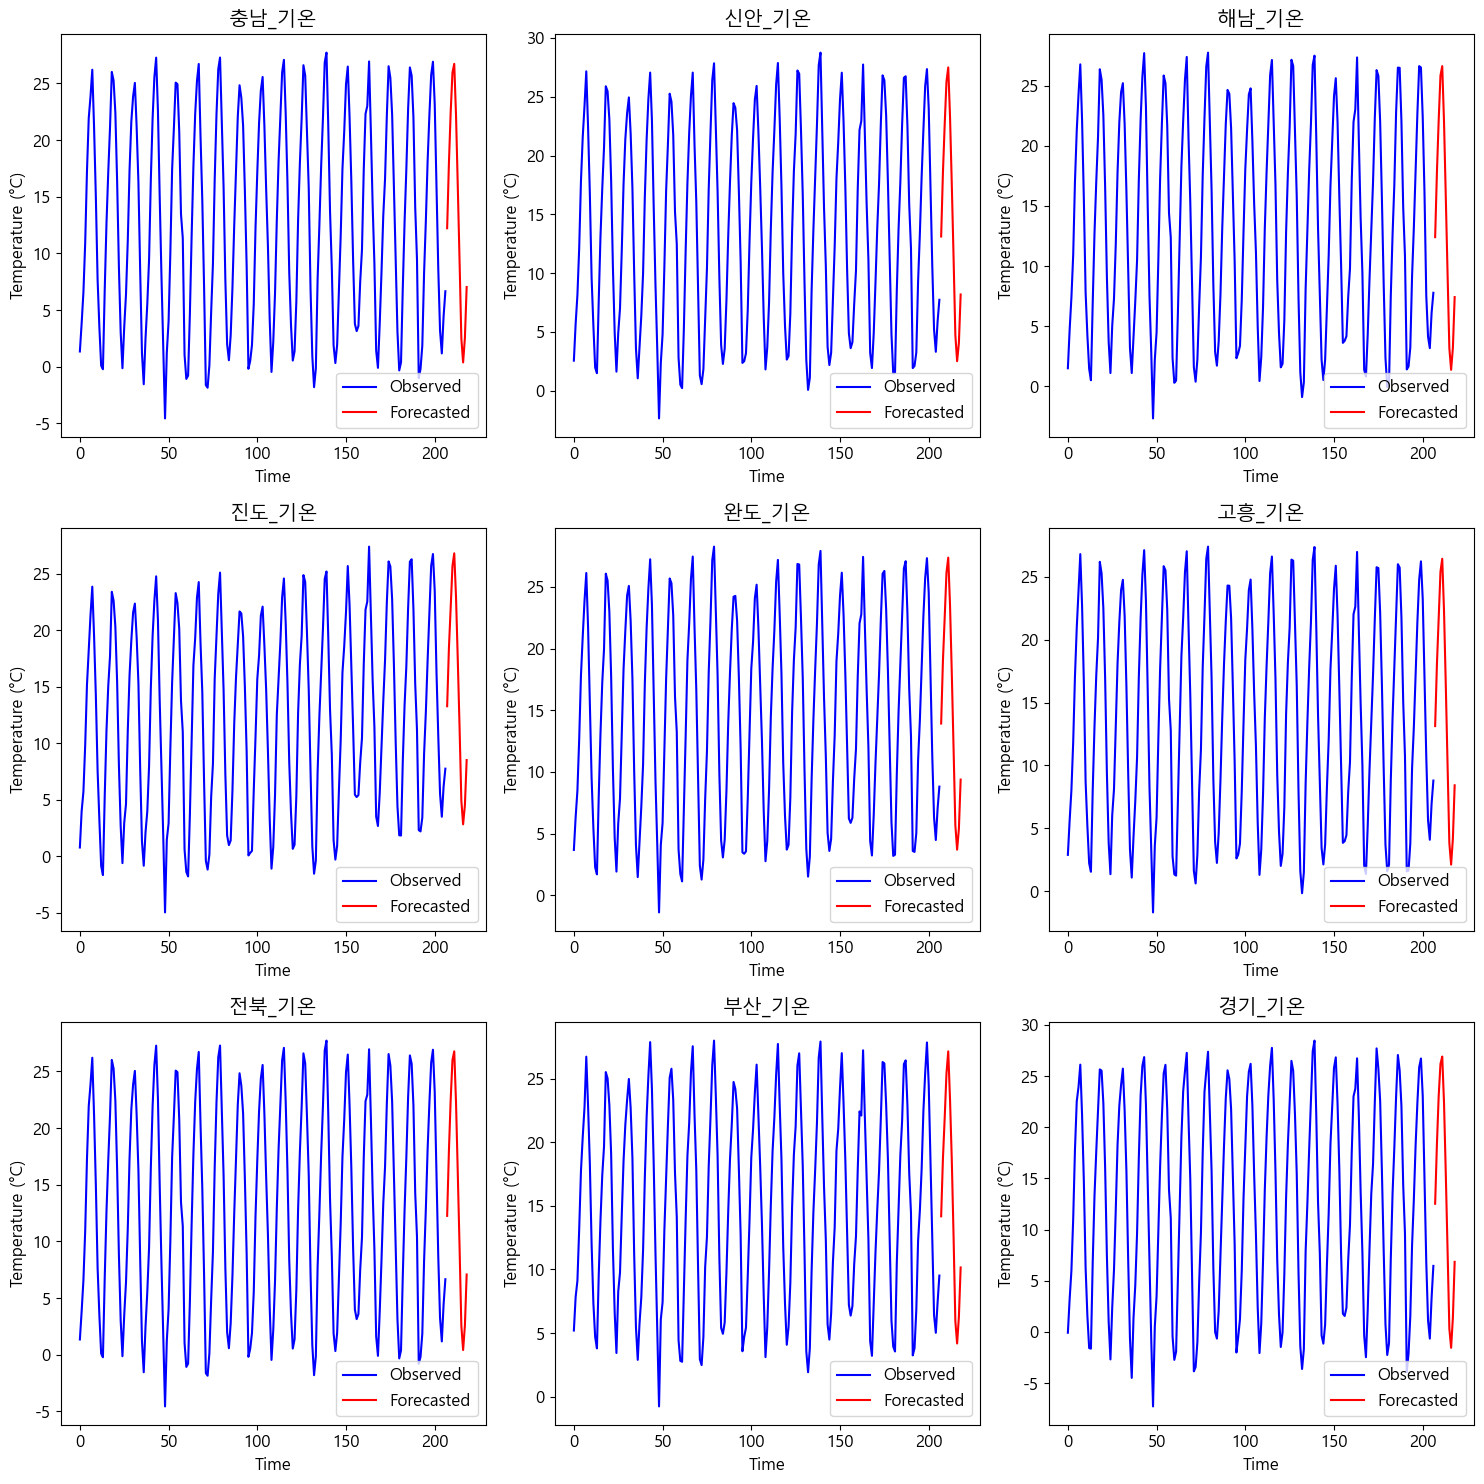

In [2]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.unicode_minus'] = False

data_path = './최최/기온 관련 자료 최종.xlsx'
data = pd.read_excel(data_path)

data['일시'] = pd.to_datetime(data['일시'])

data['Year'] = data['일시'].dt.year
data['Month'] = data['일시'].dt.month

monthly_avg_temp = data.groupby(['Year', 'Month']).mean().reset_index()

regions = ['충남_기온', '신안_기온', '해남_기온', '진도_기온', '완도_기온', '고흥_기온', '전북_기온', '부산_기온', '경기_기온']
monthly_avg_temp = monthly_avg_temp[['Year', 'Month'] + regions]

def forecast_temperature(data, steps=10):
    model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=steps)
    return forecast

forecast_results = {}
steps = 12

for region in regions:
    data_region = monthly_avg_temp[region]
    forecast_results[region] = forecast_temperature(data_region, steps)

forecast_df = pd.DataFrame(forecast_results)
forecast_df['Year'] = [2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2025, 2025, 2025]
forecast_df['Month'] = [4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3]

display(forecast_df)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for idx, region in enumerate(regions):
    ax = axes[idx // 3, idx % 3]
    monthly_avg_temp[region].plot(ax=ax, label='Observed', color='blue')
    forecast_df[region].plot(ax=ax, label='Forecasted', color='red')
    ax.set_title(region)
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature (°C)')
    ax.legend()

plt.tight_layout()
plt.show()

Month
1     4464
3     4464
5     4216
7     4216
8     4216
10    4216
12    4216
4     4080
6     4080
9     4080
11    4080
2     4072
Name: count, dtype: int64
충남_기온 - AIC: 643.6831133529865, BIC: 660.0224041483032
신안_기온 - AIC: 619.7647896778037, BIC: 636.1040804731203
해남_기온 - AIC: 646.2544525452406, BIC: 662.5937433405572
진도_기온 - AIC: 676.5993755565961, BIC: 692.9386663519127
완도_기온 - AIC: 614.4135288292771, BIC: 630.7528196245937
고흥_기온 - AIC: 620.5353533696916, BIC: 636.8746441650082
전북_기온 - AIC: 644.1462912146308, BIC: 660.4855820099474
부산_기온 - AIC: 646.6190238212804, BIC: 662.958314616597
경기_기온 - AIC: 690.9613463129119, BIC: 707.3006371082286


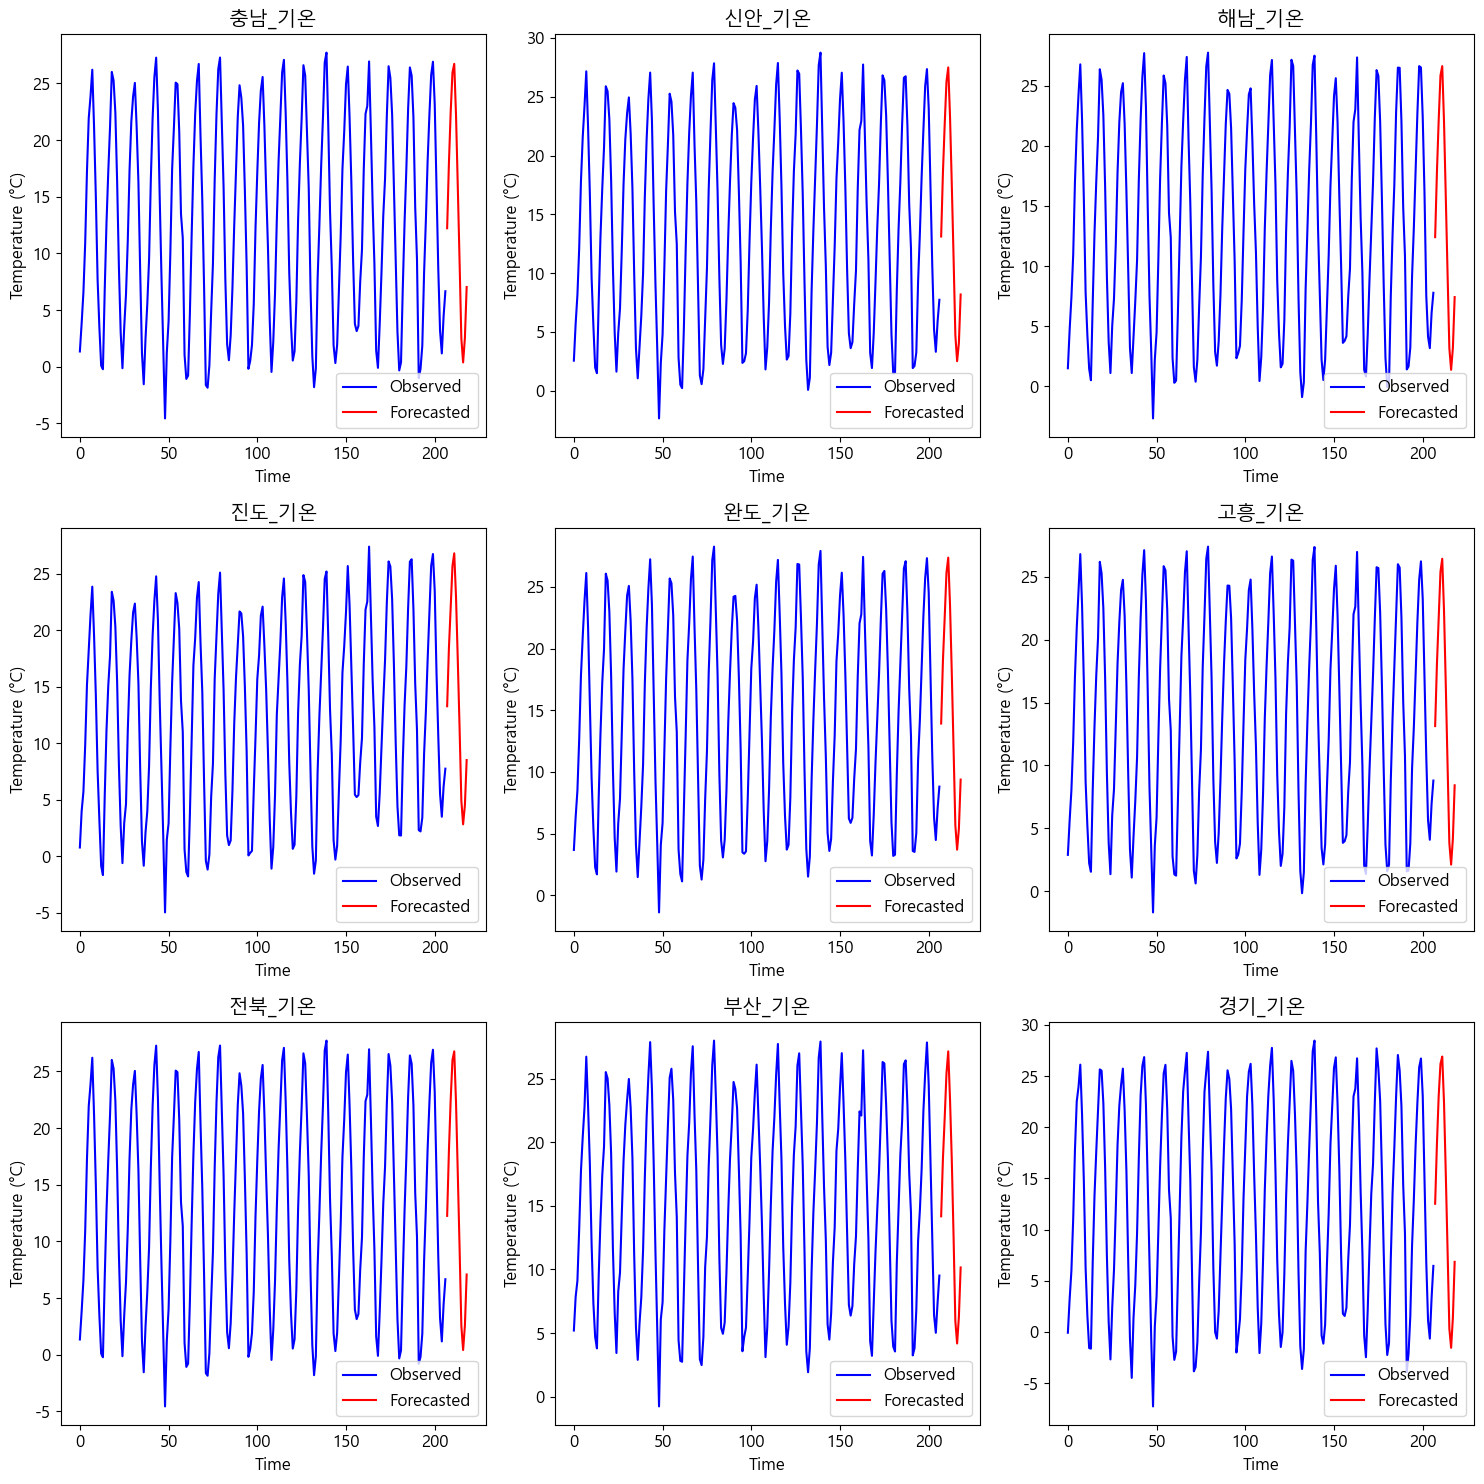

충남_기온 - MSE: 0.5803837418927986, RMSE: 0.7618292078233799
신안_기온 - MSE: 0.4930874732193647, RMSE: 0.702201874975683
해남_기온 - MSE: 1.4966649853739564, RMSE: 1.2233825997511802
진도_기온 - MSE: 0.6418633511408193, RMSE: 0.8011637480196039
완도_기온 - MSE: 0.503576435223683, RMSE: 0.7096311966251787
고흥_기온 - MSE: 1.5039182893594687, RMSE: 1.2263434630475545
전북_기온 - MSE: 0.57921011067793, RMSE: 0.7610585461565555
부산_기온 - MSE: 0.5158874116906461, RMSE: 0.718253027623724
경기_기온 - MSE: 0.6936317506780205, RMSE: 0.8328455743281707


In [4]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data_path = '기온 관련 자료 최종 (1).xlsx'
data = pd.read_excel(data_path)

# 날짜 데이터를 datetime 형식으로 변환
data['일시'] = pd.to_datetime(data['일시'])

# 연도와 월을 추출
data['Year'] = data['일시'].dt.year
data['Month'] = data['일시'].dt.month

print(data['Month'].value_counts())
# 월별 평균 기온 계산
monthly_avg_temp = data.groupby(['Year', 'Month']).mean().reset_index()

# 사용할 기온 데이터 열을 선택
regions = ['충남_기온', '신안_기온', '해남_기온', '진도_기온', '완도_기온', '고흥_기온', '전북_기온', '부산_기온', '경기_기온']
monthly_avg_temp = monthly_avg_temp[['Year', 'Month'] + regions]

# SARIMA 모델을 사용하여 월별 평균 기온 예측 및 정확도 평가
def forecast_temperature(data, steps=10):
    model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=steps)
    aic = model_fit.aic
    bic = model_fit.bic
    return forecast, aic, bic

# 예측 결과 저장
forecast_results = {}
aic_bic_values = {}
steps = 12  # 예측할 월 수

for region in regions:
    data_region = monthly_avg_temp[region]
    forecast, aic, bic = forecast_temperature(data_region, steps)
    forecast_results[region] = forecast
    aic_bic_values[region] = {'AIC': aic, 'BIC': bic}

# 예측 결과를 데이터프레임으로 저장
forecast_df = pd.DataFrame(forecast_results)
forecast_df['Year'] = [2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2025, 2025, 2025]
forecast_df['Month'] = [4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3]
# forecast_df['Month'] = range(4, 4 + steps)

# AIC, BIC 값 출력
for region in regions:
    print(f"{region} - AIC: {aic_bic_values[region]['AIC']}, BIC: {aic_bic_values[region]['BIC']}")
    
# 예측 결과 시각화
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for idx, region in enumerate(regions):
    ax = axes[idx // 3, idx % 3]
    monthly_avg_temp[region].plot(ax=ax, label='Observed', color='blue')
    forecast_df[region].plot(ax=ax, label='Forecasted', color='red')
    ax.set_title(region)
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature (°C)')
    ax.legend()

plt.tight_layout()
plt.show()

# 실제 값과 예측 값 비교를 위해 데이터 준비 (여기서는 임의의 실제 값 사용)
# 실제 데이터가 없다면, MSE와 RMSE는 의미가 없을 수 있습니다.
# 예제에서는 임의의 실제 데이터를 사용하여 계산 방법을 보여줍니다.

actual_values = monthly_avg_temp[regions][-steps:].reset_index(drop=True)
mse_values = {}
rmse_values = {}

for region in regions:
    mse = mean_squared_error(actual_values[region], forecast_df[region])
    rmse = np.sqrt(mse)
    mse_values[region] = mse
    rmse_values[region] = rmse

# MSE와 RMSE 값 출력
for region in regions:
    print(f"{region} - MSE: {mse_values[region]}, RMSE: {rmse_values[region]}")

Month
1     4464
3     4464
5     4216
7     4216
8     4216
10    4216
12    4216
4     4080
6     4080
9     4080
11    4080
2     4072
Name: count, dtype: int64


,충남_기온,신안_기온,해남_기온,진도_기온,완도_기온,고흥_기온,전북_기온,부산_기온,경기_기온,Year,Month
207,12.222741,13.115762,12.407756,13.278285,13.925336,13.129422,12.254121,14.177439,12.528953,2024,4
208,17.954851,18.505578,17.791481,18.418772,18.976527,18.027983,17.995208,18.678206,18.353893,2024,5
209,22.488021,22.630152,22.145020,22.025317,22.525585,21.723875,22.535458,21.912006,23.078670,2024,6
210,25.960275,26.289572,25.851930,25.684250,26.155012,25.411108,26.004146,25.401843,26.194898,2024,7
211,26.725543,27.495286,26.637070,26.810305,27.379394,26.446252,26.770730,27.141403,26.911675,2024,8
212,22.209318,23.332729,22.007838,22.961396,23.551030,22.301135,22.266631,23.380366,22.397503,2024,9
213,15.885665,17.543682,15.741189,17.344442,18.019862,16.376627,15.973899,18.600680,15.438492,2024,10
214,9.331939,11.343823,9.365723,11.404233,11.916153,10.034487,9.485434,12.620995,7.995329,2024,11
215,2.505871,4.757224,3.184289,4.944560,5.688965,3.830549,2.574393,5.939656,0.345358,2024,12
216,0.383580,2.509812,1.366375,2.829062,3.699206,2.103416,0.419368,4.181769,-1.549008,2025,1


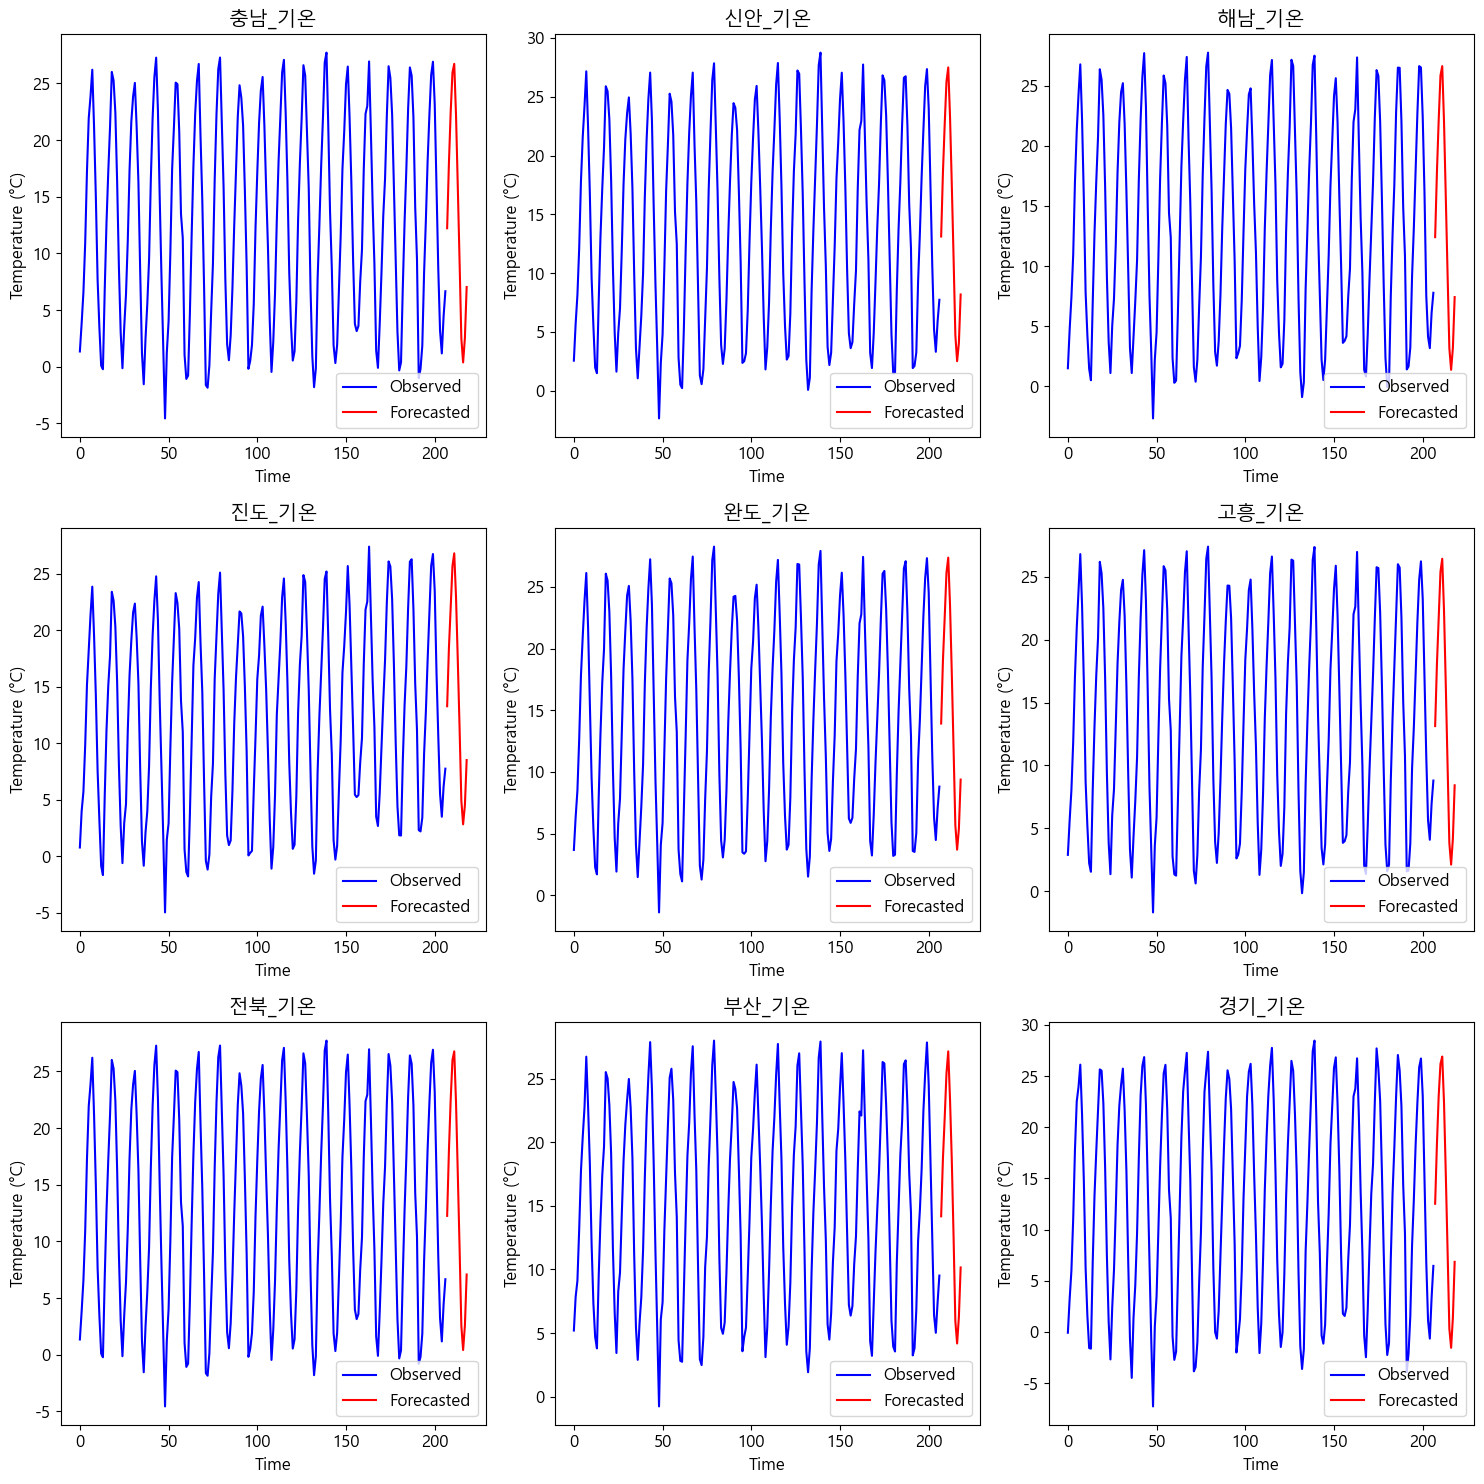

In [2]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.unicode_minus'] = False # 유니코드가 - 기호로 설정되는 폰트가 깨지는 것을 방지

# 데이터 로드
data_path = '기온 관련 자료 최종 (5).xlsx'
data = pd.read_excel(data_path)

# 날짜 데이터를 datetime 형식으로 변환
data['일시'] = pd.to_datetime(data['일시'])

# 연도와 월을 추출
data['Year'] = data['일시'].dt.year
data['Month'] = data['일시'].dt.month

print(data['Month'].value_counts())
# 월별 평균 기온 계산
monthly_avg_temp = data.groupby(['Year', 'Month']).mean().reset_index()

# 사용할 기온 데이터 열을 선택
regions = ['충남_기온', '신안_기온', '해남_기온', '진도_기온', '완도_기온', '고흥_기온', '전북_기온', '부산_기온', '경기_기온']
monthly_avg_temp = monthly_avg_temp[['Year', 'Month'] + regions]

# SARIMA 모델을 사용하여 월별 평균 기온 예측
def forecast_temperature(data, steps=10):
    model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=steps)
    return forecast

# 예측 결과 저장
forecast_results = {}
steps = 12  # 예측할 월 수

for region in regions:
    data_region = monthly_avg_temp[region]
    forecast_results[region] = forecast_temperature(data_region, steps)

# 예측 결과를 데이터프레임으로 저장
forecast_df = pd.DataFrame(forecast_results)
forecast_df['Year'] = [2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2025, 2025, 2025]
forecast_df['Month'] = [4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3]
# forecast_df['Month'] = range(4, 4 + steps)

# 예측 결과 출력
display(forecast_df)

# 예측 결과 시각화
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for idx, region in enumerate(regions):
    ax = axes[idx // 3, idx % 3]
    monthly_avg_temp[region].plot(ax=ax, label='Observed', color='blue')
    forecast_df[region].plot(ax=ax, label='Forecasted', color='red')
    ax.set_title(region)
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature (°C)')
    ax.legend()

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model

In [4]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indexes = range(i - history_size, i, step)
        data.append(dataset[indexes])

        if single_step:
            labels.append(target[i+target_size])
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [6]:
data = pd.read_excel('종합데이터 (1).xlsx')


data['완도_생산량'] = (data['해남_생산량']*(21.3/72.5)).apply(lambda x : int(x))
data['진도_생산량'] = (data['해남_생산량']*(20.9/72.5)).apply(lambda x : int(x))
data['고흥_생산량'] = (data['해남_생산량']*(6.7/72.5)).apply(lambda x : int(x))
data['신안_생산량'] = (data['해남_생산량']*(11.9/72.5)).apply(lambda x : int(x))
data['해남_생산량'] = (data['해남_생산량']*(11.7/72.5)).apply(lambda x : int(x))

data.head()

,연도,해남_생산량,해남_염도,해남_수온,해남_기온,해남_강수량,해남_풍속,해남_일조율,충남_생산량,충남_염도,...,부산_강수량,부산_풍속,부산_일조율,고흥_생산량,고흥_염도,고흥_수온,고흥_기온,고흥_강수량,고흥_풍속,고흥_일조율
0,2007-01-01,4336,33.0,9.2,1.5,13.5,2.2,40.88,3881,30.6,...,4.6,3.2,60.04,2483,27.3,6.6,2.9,10.4,1.8,51.07
1,2007-02-01,6060,32.7,8.5,4.7,60.0,2.6,56.73,3559,27.5,...,115.0,3.1,64.44,3470,27.4,7.7,5.7,66.5,2.0,64.06
2,2007-03-01,1890,32.8,9.3,7.4,158.0,3.2,44.44,673,28.0,...,75.5,3.6,50.04,1082,28.1,9.7,8.1,139.5,2.2,45.97
3,2007-04-01,173,32.8,11.2,10.9,43.0,2.6,52.06,51,25.3,...,65.5,3.8,55.78,99,31.6,12.9,11.9,63.0,1.9,53.24
4,2007-05-01,0,32.9,14.3,17.1,81.0,2.8,51.96,23,24.1,...,116.6,3.6,57.01,0,31.2,16.5,17.1,136.0,2.1,52.60


In [7]:
name = input('지역 :')
임시 = []

for i in data.columns :
    if name in i :
        임시.append(i)
        
columns = ['연도', 임시[3], 임시[0]]
print(columns)

지역 : 진도


['연도', '진도_기온', '진도_생산량']


In [8]:
jeonbuk_data = data[columns]

jeonbuk_data.set_index('연도', inplace=True)

In [9]:
jeonbuk_data.head(3)

,진도_기온,진도_생산량
연도,,
2007-01-01,1.5,7745
2007-02-01,4.7,10825
2007-03-01,7.4,3377


In [11]:
dataset = jeonbuk_data.values

tem_scaler = RobustScaler()
pro_scaler = RobustScaler()

dataset[:, 0] = tem_scaler.fit_transform(dataset[:, 0].reshape(-1, 1)).flatten()
dataset[:, 1] = pro_scaler.fit_transform(dataset[:, 1].reshape(-1, 1)).flatten()

In [12]:
TRAIN_SPLIT = int(len(jeonbuk_data)*0.8) 
EVALIDATION_INTERVAL = 200 
EPOCH = 100 
tf.random.set_seed(13)

In [13]:
past_history = 12
future_target = 1
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, target=dataset[:,-1], start_index=0, end_index=TRAIN_SPLIT, history_size=past_history, target_size=future_target, step=STEP, single_step=True)

x_val_single, y_val_single = multivariate_data(dataset, target=dataset[:,-1], start_index=TRAIN_SPLIT, end_index=None, history_size=past_history, target_size=future_target, step=STEP, single_step=True)

In [14]:
len(x_train_single), len(x_val_single)

(153, 29)

In [15]:
x_val_single

array([[[ 0.06567164,  0.        ],
        [-0.19104478,  0.22972926],
        [-0.70447761,  1.08269832],
        [-0.73432836,  1.50942866],
        [-0.53134328,  1.60979036],
        [-0.25671642,  2.04691505],
        [-0.0119403 ,  0.63208905],
        [ 0.23283582, -0.06278751],
        [ 0.54328358, -0.16546687],
        [ 0.78208955, -0.16546687],
        [ 0.75223881, -0.16546687],
        [ 0.52537313, -0.16546687]],

       [[-0.19104478,  0.22972926],
        [-0.70447761,  1.08269832],
        [-0.73432836,  1.50942866],
        [-0.53134328,  1.60979036],
        [-0.25671642,  2.04691505],
        [-0.0119403 ,  0.63208905],
        [ 0.23283582, -0.06278751],
        [ 0.54328358, -0.16546687],
        [ 0.78208955, -0.16546687],
        [ 0.75223881, -0.16546687],
        [ 0.52537313, -0.16546687],
        [ 0.14328358, -0.13168522]],

       [[-0.70447761,  1.08269832],
        [-0.73432836,  1.50942866],
        [-0.53134328,  1.60979036],
        [-0.25671642,  2


Epoch 1/100

19/19 [==============================] - 6s 91ms/step - loss: 0.4597 - val_loss: 0.7307
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3876 - val_loss: 0.6011
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.3115 - val_loss: 0.4504
Epoch 4/100
19/19 [==============================] - 0s 9ms/step - loss: 0.2357 - val_loss: 0.2877
Epoch 5/100
19/19 [==============================] - 0s 9ms/step - loss: 0.1850 - val_loss: 0.2315
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 0.1639 - val_loss: 0.3361
Epoch 7/100
19/19 [==============================] - 0s 8ms/step - loss: 0.1607 - val_loss: 0.2411
Epoch 8/100
19/19 [==============================] - 0s 7ms/step - loss: 0.1439 - val_loss: 0.1994
Epoch 9/100
19/19 [==============================] - 0s 8ms/step - loss: 0.1377 - val_loss: 0.2285
Epoch 10/100
19/19 [==============================] - 0s 10ms/step - loss: 0.1278 - val_loss: 0.2115
Epoch

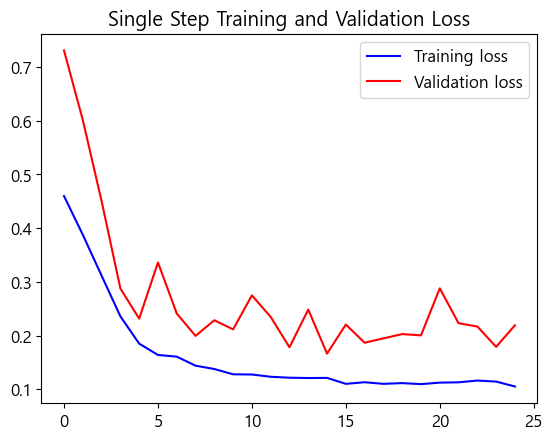

1/1 [==============================] - 1s 967ms/step
MSE: 0.07311157936771205
R2 Score: 0.8950168123570709


In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

EPOCH = 100
BATCH_SIZE = 8
STEPS_PER_EPOCH = len(x_train_single) / BATCH_SIZE

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

single_step_history = single_step_model.fit(
    x_train_single, y_train_single,
    epochs=EPOCH,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=(x_val_single, y_val_single),
    callbacks=[early_stopping]
)


def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history.get('val_loss')

    if val_loss is None:
        print("Validation loss not found in history.")
        return

    epochs = range(len(loss))

    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()
    plt.show()

plot_train_history(single_step_history, 'Single Step Training and Validation Loss')

from sklearn.metrics import mean_squared_error, r2_score

y_pred_single = single_step_model.predict(x_val_single)

mse = mean_squared_error(y_val_single, y_pred_single)
r2 = r2_score(y_val_single, y_pred_single)

print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

In [17]:
tem_prod = dataset[-12:,:].reshape(-1,12,2)

In [18]:
pred = single_step_model(tem_prod)

In [19]:
pred

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.01436896]], dtype=float32)>

In [20]:
pro_scaler.inverse_transform(pred)

array([[2151.40760706]])

3개월 멀티스템 /////// 12 달 전체 예측량을 뽑아서 전년도랑 r2

In [29]:
r2_score(y_true, pred)

0.8485281040994365

In [67]:
single_step_model.save('Single_Step_Production.keras')